# Numpy - multidimensional data arrays

Based on lectures from http://github.com/jrjohansson/scientific-python-lectures


The `numpy` package (module) is used in almost all numerical computation using Python. It is a package that provide high-performance vector, matrix and higher-dimensional data structures for Python. It is implemented in C and Fortran so when calculations are vectorized (formulated with vectors and matrices), performance is very good.

In [1]:
from numpy import *

## Creating `numpy` arrays

There are a number of ways to initialize new numpy arrays, for example from

* a Python list or tuples
* using functions that are dedicated to generating numpy arrays, such as `arange`, `linspace`, `zeros`, `ones`, etc.
* reading data from files

In [2]:
M = array([[1,2],[3,4]])  # from list
M.shape, M.size, M.dtype

((2, 2), 4, dtype('int64'))

In [3]:
M = array([[1,2],[3,4]], dtype=complex)  # from list
print(M)
M.shape, M.size, M.dtype

[[1.+0.j 2.+0.j]
 [3.+0.j 4.+0.j]]


((2, 2), 4, dtype('complex128'))

In [4]:
x = arange(0,10,0.5)  # linear mesh start:stop:increment
print(x)
y = linspace(0,10,21) # linear mesh start,stop,number of points
print(y)
z = logspace(-3,10,10) # log mesh, 10^start, 10^stop, number of points
print(z)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
[ 0.   0.5  1.   1.5  2.   2.5  3.   3.5  4.   4.5  5.   5.5  6.   6.5
  7.   7.5  8.   8.5  9.   9.5 10. ]
[1.00000000e-03 2.78255940e-02 7.74263683e-01 2.15443469e+01
 5.99484250e+02 1.66810054e+04 4.64158883e+05 1.29154967e+07
 3.59381366e+08 1.00000000e+10]


In [5]:
zeros((3,3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [6]:
ones((3,3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

### Random number generators

In [7]:
from numpy import random
random.rand(5,5)  # uniform distributed (5x5) matrix
random.randn(5,5) # standard normal distribution random matrix

array([[ 2.02416659, -0.43260055,  0.77905335, -1.92192505,  0.05204534],
       [-0.87642261, -0.54946837, -0.30366629, -0.18542414, -0.72348251],
       [-2.26955186,  0.26564121, -0.23948125, -0.67817216, -0.36464496],
       [ 1.41053231,  0.47934518,  1.57847616, -2.48520635,  0.99547316],
       [-1.81677266, -0.40041586, -0.45344461, -1.81366793, -0.72364658]])

## File I/O

Very common form is comma-separated values (CSV) or tab-separated values (TSV). To read data from such files into Numpy arrays we can use the `numpy.loadtxt` or `numpy.genfromtxt`

File `stockholm_td_adj.dat.txt` contains Stockholm temperature over the years. The columns are [$year$,$month$,$day$,$T_{average}$,$T_{min}$,$T_{max}$]

In [8]:
## Check if file exists
!tail stockholm_td_adj.dat.txt

2011 12 22    -0.4    -1.0    -1.0 1
2011 12 23     3.7     3.1     3.1 1
2011 12 24     3.2     2.6     2.6 1
2011 12 25     4.2     3.5     3.5 1
2011 12 26     8.2     7.5     7.5 1
2011 12 27     8.3     7.6     7.6 1
2011 12 28     2.6     1.9     1.9 1
2011 12 29     4.9     4.2     4.2 1
2011 12 30     0.6    -0.1    -0.1 1
2011 12 31    -2.6    -3.3    -3.3 1

In [9]:
data = loadtxt('stockholm_td_adj.dat.txt')
data.shape

(77431, 7)

In [10]:
# inline figures from matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

In [11]:
# time in years when we have year/month/day
t = data[:,0]+data[:,1]/12.+data[:,2]/365

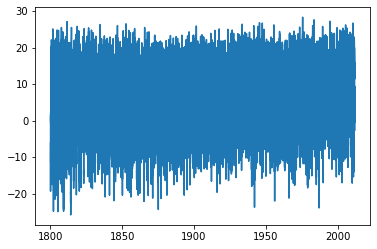

In [12]:
plt.plot(t, data[:,3])

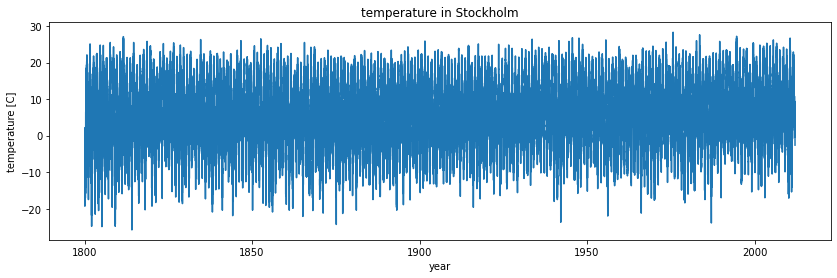

In [13]:
# a bit more extended in x-direction
plt.figure(figsize=(14,4))
plt.plot(t, data[:,3])
plt.title('temperature in Stockholm')
plt.xlabel('year')
plt.ylabel('temperature [C]');

Lets save the data in the form [t,$T_{average}$]

In [14]:
vstack((t,data[:,3])).T.shape

(77431, 2)

In [15]:
savetxt('StockholmT.dat', vstack((t,data[:,3])).T)

In [16]:
!tail StockholmT.dat

2.012060273972602772e+03 -4.000000000000000222e-01
2.012063013698630130e+03 3.700000000000000178e+00
2.012065753424657487e+03 3.200000000000000178e+00
2.012068493150684844e+03 4.200000000000000178e+00
2.012071232876712429e+03 8.199999999999999289e+00
2.012073972602739786e+03 8.300000000000000711e+00
2.012076712328767144e+03 2.600000000000000089e+00
2.012079452054794501e+03 4.900000000000000355e+00
2.012082191780821859e+03 5.999999999999999778e-01
2.012084931506849216e+03 -2.600000000000000089e+00


### More efficient binary storage of data to the disc

In [17]:
save('ST_data',data)
!ls -ltr

total 32672
-rw-r--r--@ 1 haule  staff  2864946 Dec 31 22:57 stockholm_td_adj.dat.txt
-rw-r--r--  1 haule  staff  3891176 Dec 31 23:15 tt.dat
-rw-r--r--  1 haule  staff      928 Dec 31 23:19 random-matrix.npy
-rw-r--r--  1 haule  staff      168 Jan  8 23:36 www
-rw-r--r--  1 haule  staff     2500 Jan 10 00:13 bb.dat
-rw-r--r--  1 haule  staff      736 Jan 19 18:16 mymodule.py
drwxr-xr-x  3 haule  staff       96 Jan 19 18:17 __pycache__
-rw-r--r--  1 haule  staff    26604 Jan 19 18:20 00 Introduction.ipynb
-rw-r--r--  1 haule  staff    15439 Jan 19 20:19 01 Basic Python.ipynb
-rw-r--r--  1 haule  staff   152216 Jan 19 23:49 003 Numpy.ipynb
-rw-r--r--  1 haule  staff  3889864 Jan 20 00:19 StockholmT.dat
-rw-r--r--  1 haule  staff  4336264 Jan 20 00:19 ST_data.npy


In [18]:
data2=load('ST_data.npy')

In [19]:
allclose(data,data2)  # how close are the two sets of data

True

## Manipulating data

### Indexing and slicing

data[lower:upper:step, lower:upper:step]

In [20]:
print(data[0])    # first row from the file
print(data[:,0])  # years
array(data[-3650::365,0],dtype=int) # the years with 365 spacings, and then last years

[ 1.8e+03  1.0e+00  1.0e+00 -6.1e+00 -6.1e+00 -6.1e+00  1.0e+00]
[1800. 1800. 1800. ... 2011. 2011. 2011.]


array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011])

**Fancy indexing**
Index is itself an array of integer numbers, i.e, which rows or columns?


In [21]:
data[[0,365,2*365,3*365],0]

array([1800., 1801., 1802., 1803.])

**Using mask to pick data***

Create a mask of `[True,....False....]` values, and pick from the array only columns/rows where `True`. 

How to compute average temperature in the year of 1973?

In [22]:
# Create mask for the year 1973
mask = logical_and(data[:,0] >= 1973, data[:,0] < 1974)

In [23]:
data[mask,0];  # All should have 1973

In [24]:
T1973 = data[mask,3]
print('Average temperature in 1973=', sum(T1973)/len(T1973))

Average temperature in 1973= 7.414794520547944


In [25]:
# where tells you the index where True
indices = where(mask)
X = data[indices,0]; # This gives similar data in 1973, but not identical

In [26]:
print(T1973.shape, X1973.shape)
print('Average temperature in 1973=', sum(X1973[0,:])/len(X1973[0,:]))

NameError: name 'X1973' is not defined

**What is the mean monthly temperatures for each month of the year?**

Let's do Ferbrurary first

In [27]:
Febr=data[:,1]==2
mean(data[Febr,3])

-3.212109570736596

Now loop for all months

In [28]:
monthly_mean=[mean(data[data[:,1]==month,3]) for month in range(1,13)]

Text(0, 0.5, 'average temperature')

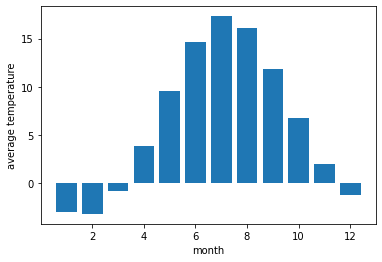

In [29]:
plt.bar(range(1,13),monthly_mean);
plt.xlabel('month')
plt.ylabel('average temperature')

## Linear Algebra

It is implemented in low level fortran/C code, and is much more efficient than code written in Python.

In [30]:
A = random.rand(3,3)
print(A)
A*A  # It is not matrix-matrix product, but element-wise product

[[0.04555081 0.76134273 0.27983383]
 [0.5978349  0.57132726 0.90666559]
 [0.08238817 0.01148468 0.03638785]]


array([[2.07487674e-03, 5.79642756e-01, 7.83069727e-02],
       [3.57406568e-01, 3.26414839e-01, 8.22042488e-01],
       [6.78781129e-03, 1.31897898e-04, 1.32407588e-03]])

Matrix product or matrix-vector product can be performed by `dot` command

In [31]:
dot(A,A)

array([[0.48028713, 0.47286944, 0.71321247],
       [0.44348977, 0.79198486, 0.71828881],
       [0.01361672, 0.06970505, 0.03479184]])

In [32]:
v1 = random.rand(3)
print(v1)
print( dot(A,v1) ) # matrix.vector product
print( dot(v1,v1) ) # length of vector^2

[0.11528416 0.99530108 0.39497281]
[0.87354329 0.99567179 0.03530098]
1.1599181975535275


In [33]:
A*v1

array([[0.00525129, 0.75776524, 0.11052676],
       [0.0689209 , 0.56864264, 0.35810826],
       [0.00949805, 0.01143072, 0.01437221]])

Slightly less efficient, but nicer code can be obtained by `matrix` clas

In [34]:
M = matrix(A)
v = matrix(v1).T # create a column vector

In [35]:
M*M  # this is now matrix-matrix product

matrix([[0.48028713, 0.47286944, 0.71321247],
        [0.44348977, 0.79198486, 0.71828881],
        [0.01361672, 0.06970505, 0.03479184]])

In [36]:
M*v # this is matrix*vector product

matrix([[0.87354329],
        [0.99567179],
        [0.03530098]])

In [37]:
v.T*M # vector*matrix product

matrix([[0.6328181 , 0.66094953, 0.94903786]])

In [38]:
v.T*v # inner-product

matrix([[1.1599182]])

**Array/Matrix transformations**

* `.T` or  `transpose(M)` transposes matrix
* `.H` hermitian conjugate
* `conjugate(M)` conjugates
* `real(M)` and `imag(M)` takes real and imaginary part of the matrix

### More advanced linear algebra operations

Library `linalg`:

* `linalg.det(A)`
* `linalg.inv(A)` or just `M.I`
* `linalg.eig`, `linalg.eigvals`, `linalg.eigh`
* `linalg.svd()`
* `linalg.solve()`
* `linalg.cholesky()`

In [39]:
from numpy import linalg

In [40]:
print( linalg.det(A) )
linalg.inv(A)

0.029531018752294295


array([[  0.35137994,  -0.82929159,  17.96099771],
       [  1.79284685,  -0.72457717,   4.26653326],
       [ -1.36143853,   2.10634458, -14.531596  ]])

In [41]:
M.I

matrix([[  0.35137994,  -0.82929159,  17.96099771],
        [  1.79284685,  -0.72457717,   4.26653326],
        [ -1.36143853,   2.10634458, -14.531596  ]])

The eigenvalue problem for a matrix $A$:

$\displaystyle A v_n = \lambda_n v_n$

where $v_n$ is the $n$th eigenvector and $\lambda_n$ is the $n$th eigenvalue.

To calculate eigenvalues of a matrix, use the `eigvals` (symmetric/hermitian `eigvalsh`) and for calculating both eigenvalues and eigenvectors, use the function `eig` (or `eigh`):

In [58]:
linalg.eigvals(A)

array([10.05094136,  0.53193003,  0.02484373])

In [65]:
A = array([[1,2,3], [4,5,6], [7,8,9]])
b = array([1,2,3])
x = linalg.solve(A,b)
print(x)
dot(A,x)-b

[-0.23333333  0.46666667  0.1       ]


array([ 0.00000000e+00, -2.22044605e-16,  0.00000000e+00])

### sum, cumsum, trace, diag

In [43]:
print( sum(v1) )
print( cumsum(v1) )
print( trace(A) )
print( diag(A) )
print( sum(diag(A)) )

1.505558054386877
[0.11528416 1.11058524 1.50555805]
0.6532659291244824
[0.04555081 0.57132726 0.03638785]
0.6532659291244824


## Reshaping, resizing, and stacking arrays

In [44]:
A.shape
Ag = reshape(A, (9,1))  # this is not new data

In [45]:
Ag[0]=10
A        # we change A when we change Ag

array([[10.        ,  0.76134273,  0.27983383],
       [ 0.5978349 ,  0.57132726,  0.90666559],
       [ 0.08238817,  0.01148468,  0.03638785]])

In [46]:
Ax = A.flatten()  # flatten creates 1D array of all data, but creates a copy
Ax[0]=100         # changing a copy
print(A)

[[10.          0.76134273  0.27983383]
 [ 0.5978349   0.57132726  0.90666559]
 [ 0.08238817  0.01148468  0.03638785]]


## Vectorizing functions

Every function written in Python is very slow. However numpy type operations are fast, because they are written in fortran/C

In [47]:
Temp = data[:,3]

Temp**2  #  this is fast, written in C

array([ 37.21, 237.16, 225.  , ...,  24.01,   0.36,   6.76])

In [48]:
array([Temp[i]**2 for i in range(len(Temp))])  # This is slow, written in Python

array([ 37.21, 237.16, 225.  , ...,  24.01,   0.36,   6.76])

What if we have a function that can not simply work on arrays?

For example, theta function?

In [49]:
def Theta(x):
    if x>=0:
        return 1
    else:
        return 0

In [50]:
# Does not work on array
Theta(Temp)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

We can vectorize Theta, to make it applicable to arrays. 

This is simply achieved by call to numpy function `vectorize`, which will create low-level routine from your function

In [51]:
Theta_vec = vectorize(Theta)

In [52]:
# This is very fast now, and creates 0 or ones
positive_temperatures=Theta_vec(Temp)
positive_temperatures

array([0, 0, 0, ..., 1, 1, 0])

**How to calculate number of days in a year with positive temperatures?**

In [53]:
# Boolean array to select data with positive temperatures
positives = array(positive_temperatures, dtype=bool)
# keeps data with positive temperatures only
kept = data[positives,0]
# now we just need to check how many of these data are in each year

In [54]:
years = list(range(1800,2013,1))
hist = histogram(kept, bins=years)

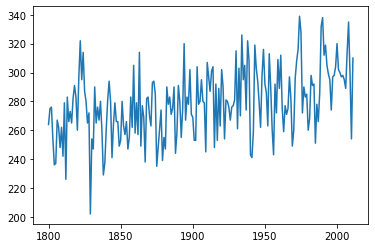

In [55]:
plt.plot(hist[1][:-1], hist[0]);